# New Horizons LORRI camera

In [281]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import linregress
from scipy.optimize import curve_fit
from ssi import SSI
from ssi import LORRI

In [282]:
#img = LORRI('lor_0034735439_0x630_sci.pho.cub', align='true') #offset_l=-7)
#img = LORRI('lor_0034866662_0x630_sci.pho.cub', offset_l=-7)
#img = LORRI('lor_0034823099_0x630_sci.pho.cub', align='TRUE')
#img = LORRI('lor_0034930319_0x630_sci.pho.cub', offset_l=-2)#align='TRUE') #where to pick the scan from?
img = LORRI('lor_0034931999_0x630_sci.pho.cub', offset_l=1)
#img = LORRI('lor_0034975919_0x630_sci.pho.cub', offset_s=-5, offset_l=-12)#align='TRUE')
#img = LORRI('lor_0035025959_0x630_sci.pho.cub', align='TRUE')

img

<LORRI> Cube: lor_0034931999_0x630_sci
 - Size: (1024, 1024)
 - Start time: 2007-02-28 01:28:01.366000
 - Filter name: None
 - Exposure: 0.004 sec
 - Main target: Europa
 - Data alignment: (-22, 1)

In [283]:
img.data  # I/F (with RSOLAR radiance conversion factor)

array([[ 3.0550151e-04, -3.6978538e-04,  1.4856868e-04, ...,
         8.2448404e-04,  1.1480103e-03, -5.1528570e-04],
       [ 3.0556749e-04, -3.6986405e-04,  1.4860053e-04, ...,
         2.1770287e-04, -7.3667627e-04,  1.1725043e-04],
       [ 2.0957523e-04, -3.6075729e-05, -4.6525718e-04, ...,
        -4.6009064e-04,  6.8204600e-04, -7.4212760e-05],
       ...,
       [ 3.6314593e-04, -2.2407169e-04,  3.4934765e-04, ...,
        -1.6898726e-04,  7.1756840e-05, -1.9806296e-04],
       [-1.0244349e-04, -2.7989541e-04, -5.1045819e-05, ...,
        -1.3436923e-04,  5.3779007e-04,  4.0595548e-04],
       [ 3.7635193e-04, -3.2208103e-04,  8.2540384e-04, ...,
         3.7032916e-04,  5.2279611e-05, -6.2127865e-04]], dtype=float32)

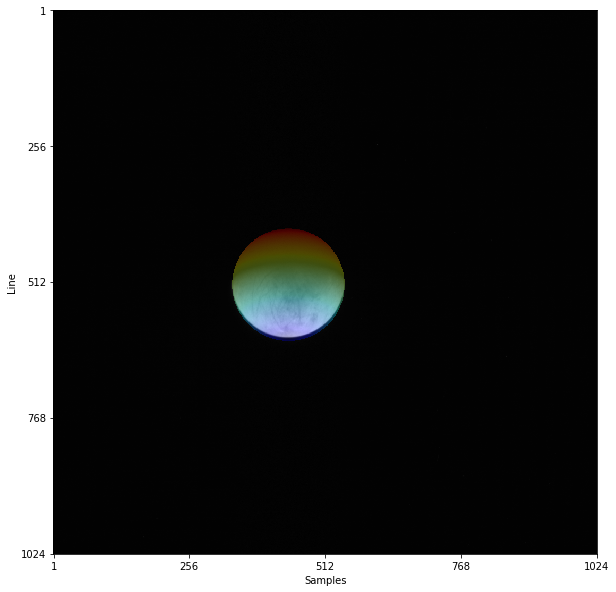

In [284]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.imshow(img.data, cmap='gray', extent=img.extent)
ax.imshow(img.inc, cmap='jet', extent=img.extent, alpha=.3)

ax.set_xlabel('Samples')
ax.set_ylabel('Line')
ax.set_xticks(img.sticks)
ax.set_yticks(img.lticks);

#plt.xlim(256, 768)
#plt.ylim(256, 768);

In [294]:
L = 530
i_f = img.data[:, L]
inc = img.inc[:, L]
emi = img.emi[:, L]
mu0 = img.mu0[:, L]
mu1 = img.mu1[:, L]

#S = 650
#i_f = img.data[S, :]
#inc = img.inc[S, :]
#emi = img.emi[S, :]
#mu0 = img.mu0[S, :]
#mu1 = img.mu1[S, :]

In [295]:
xdata = np.log(mu0 * mu1)
ydata = np.log(i_f * mu1)
cond = ~np.isnan(xdata) & ~np.isnan(ydata)

k, lnB0, r_value, p_value, std_err = linregress(xdata[cond], ydata[cond])

f'k: {k:.2e}, B0: {np.exp(lnB0):.2e}, r^2: {r_value**2:.2f}'

'k: 7.08e-01, B0: 5.57e-01, r^2: 0.89'

In [296]:
x = np.linspace(np.nanmin(xdata), np.nanmax(xdata))
y = k * x + lnB0

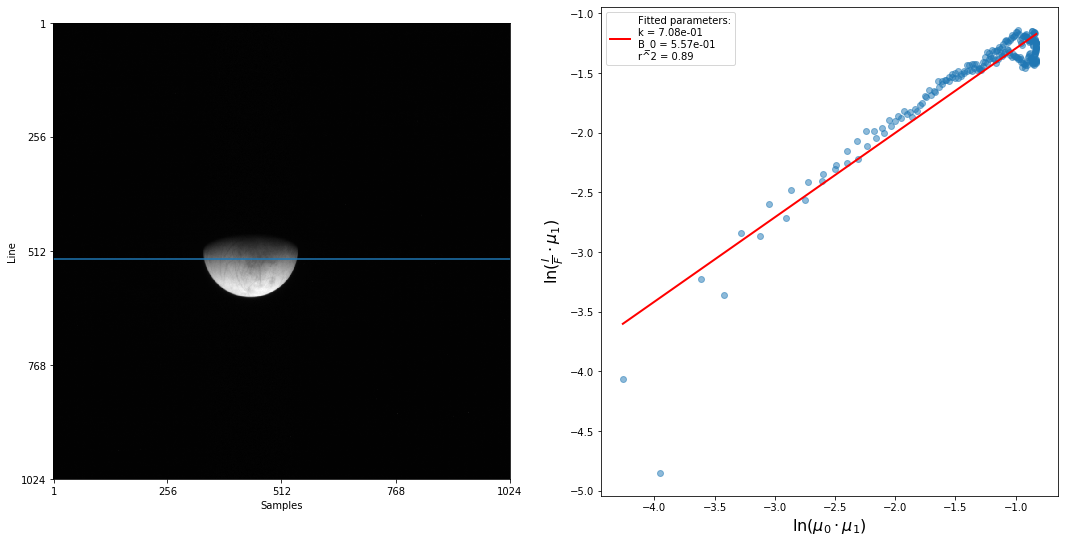

In [297]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(18, 9))

ax0.imshow(img.data, cmap='gray', extent=img.extent)
#ax0.imshow(img.inc, cmap='jet', extent=img.extent, alpha=.3)
ax0.axhline(L)
#ax0.axvline(S)

ax0.set_xlabel('Samples')
ax0.set_ylabel('Line')
ax0.set_xticks(img.sticks)
ax0.set_yticks(img.lticks)

ax1.scatter(xdata, ydata, alpha=.5)
ax1.plot(x, y, 'r-', lw=2, label=f'Fitted parameters:\nk = {k:.2e}\nB_0 = {np.exp(lnB0):.2e}\nr^2 = {r_value**2:.2f}')
ax1.set_xlabel(r'$\ln(\mu_0 \cdot \mu_1)$', fontsize=16)
ax1.set_ylabel(r'$\ln(\frac{I}{F} \cdot \mu_1)$', fontsize=16)
ax1.legend();

In [289]:
cond = ~np.isnan(img.phase)
np.max(img.phase[cond])

70.59025573730469

In [204]:
cond = ~np.isnan(img.phase)
np.min(img.phase[cond])

127.6962661743164

In [205]:
cond = ~np.isnan(img.inc)
np.max(img.inc[cond])

179.6201629638672

In [206]:
cond = ~np.isnan(img.emi)
np.max(img.emi[cond])

89.63048553466797